In [2]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# load data
dataset = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
data = dataset.copy()  # make copy of loaded dataset. 
data.shape

(1470, 35)

In [6]:
# view some observations in data
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [8]:
#check for null values
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
# lets see the what knd of nformaton above data gves
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


shows skewness and lacks normality but no outliers.

#### Check Target Feature Distribution

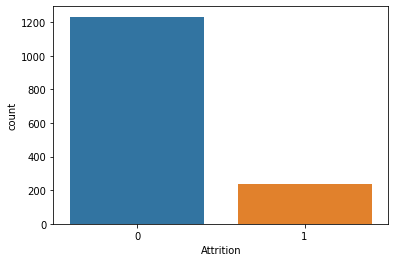

In [11]:
# Reassign target
data.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
attrition = data[data['Attrition']==1]
no_attrition = data[data['Attrition'] == 0]
sns.countplot(data.Attrition)

*Looking above plot it clearly indicates the class imbalance *

It is always recommended to check for class imbalance in Classification problems.

Class imbalance is very common in Machine Learning especially in classification.Standard accuracy measure for example accuracy_score is no longer reliable performance evaluation metrics instead we need to opt for other metrics.

To handle such class imbalance many techniques are available but for this particular problem i have used  oversampling methods because this technique gave the better result for this particular probem.

### 1.EDA and Feature Engineering
In this particular dataset we can also do feature creations(creating new features) but not done in this notebook.

In this notebook detail data exploration is not done only important EDA from perspective of ML model is done here.

#### 1.1 Numerical features

In [12]:
## numerical features
numerical_features = [feature for feature in data.columns if data[feature].dtypes !='O']
print('The number of numerical_features are :', len(numerical_features))
print('\n',numerical_features)

The number of numerical_features are : 27

 ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [13]:
data[numerical_features].head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


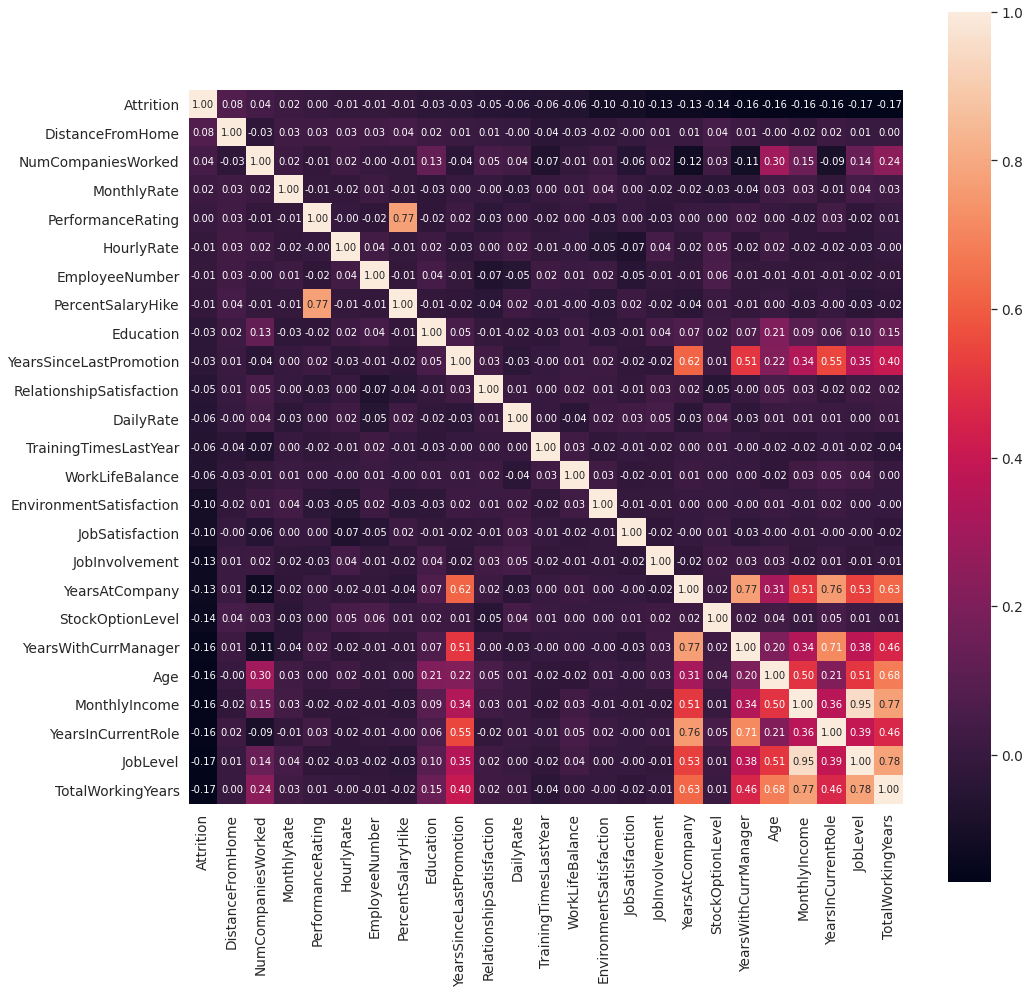

In [14]:
# Zoomed heatmap, correlation matrix
sns.set(rc={'figure.figsize':(16,16)})
correlation_matrix = data.corr()

k = 27             #number of variables for heatmap
cols = correlation_matrix.nlargest(k, 'Attrition')['Attrition'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [15]:
## discrete features

discrete_features = [feature for feature in numerical_features if len(data[feature].unique())<20]
print('The numbers of discrete features are: ', len(discrete_features))
print('\n', discrete_features)

The numbers of discrete features are:  18

 ['Attrition', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [16]:
data[discrete_features].head()

,Attrition,Education,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,2,1,2,3,2,4,8,11,3,1,80,0,0,1,4,0,5
1,0,1,1,3,2,2,2,1,23,4,4,80,1,3,3,7,1,7
2,1,2,1,4,2,1,3,6,15,3,2,80,0,3,3,0,0,0
3,0,4,1,4,3,1,3,1,11,3,3,80,0,3,3,7,3,0
4,0,1,1,1,3,1,2,9,12,3,4,80,1,3,3,2,2,2


In [17]:
## continuous features

continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print('The numbers fo continuous features are : ', len(continuous_features))
print('\n', continuous_features)

The numbers fo continuous features are :  9

 ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany']


In [18]:
data[continuous_features].head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
0,41,1102,1,1,94,5993,19479,8,6
1,49,279,8,2,61,5130,24907,10,10
2,37,1373,2,4,92,2090,2396,7,0
3,33,1392,3,5,56,2909,23159,8,8
4,27,591,2,7,40,3468,16632,6,2


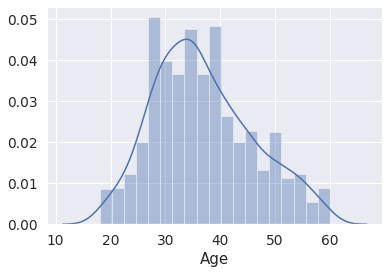

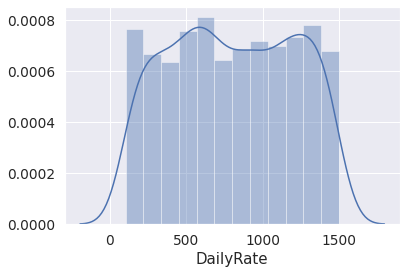

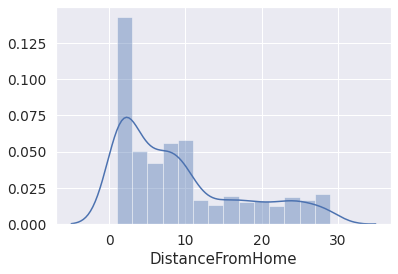

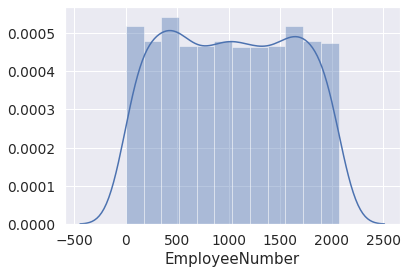

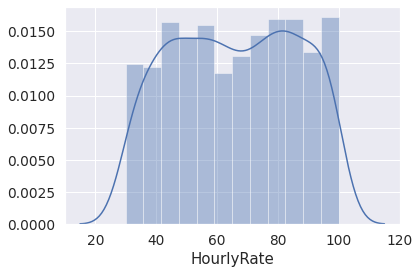

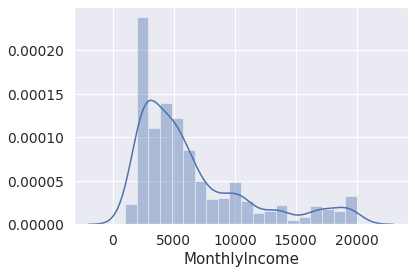

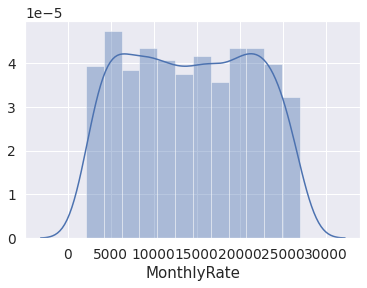

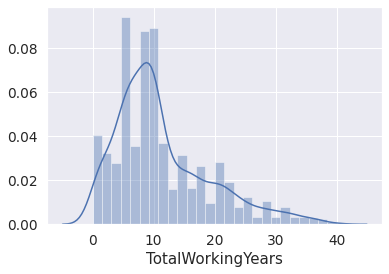

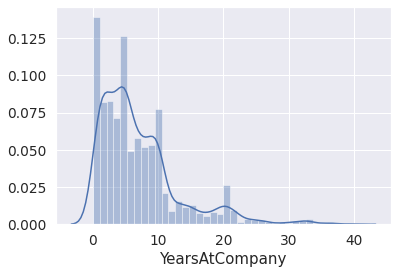

In [19]:
## Observing distribution of continuous features

for feature in continuous_features:
    plt.figure(figsize=(6,4))
    sns.distplot(data[feature])

NO normality(normal distribution) and shows postitive skewness. Need tot perform some transformation.

#### Outliers in Numerical features(continuous data)

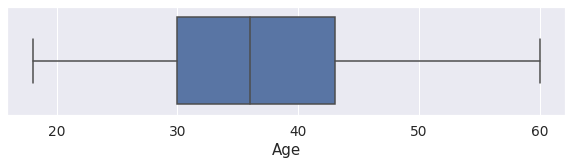

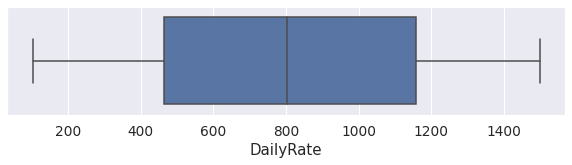

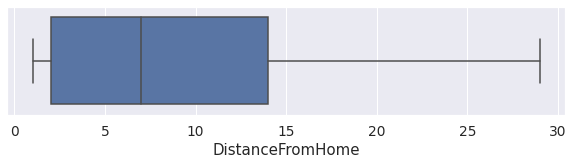

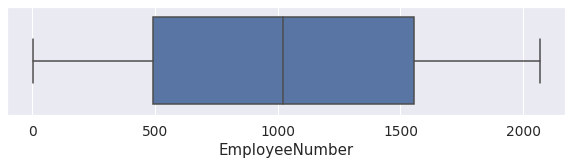

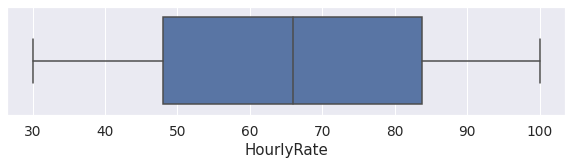

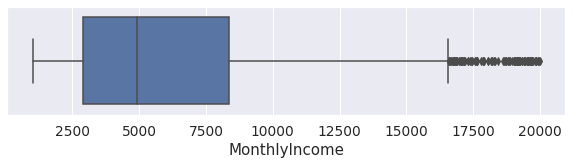

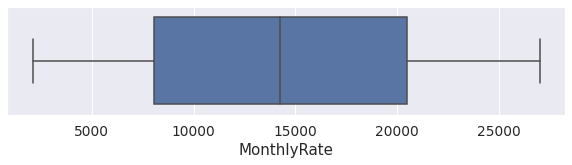

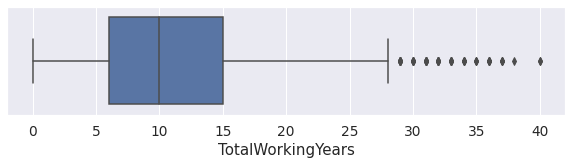

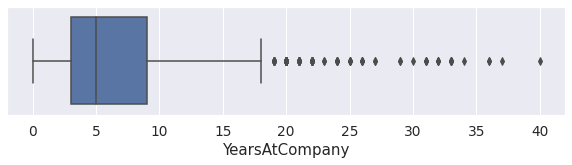

In [20]:
for feature in continuous_features:
    plt.figure(figsize=(10,2))
    sns.boxplot(data[feature])

NO visible outliers.

The skewness in above continuous features are somewhat reduced using square root transformation as below.

In [21]:
## perform sqrt transformation for continuous features
for feature in continuous_features:
    data[feature] = np.sqrt(data[feature])

## Observing distribution of continuous features

for feature in continuous_features:
    plt.figure(figsize=(6,4))
    sns.distplot(data[feature])

#### 2.2 Categorical features

In [22]:
## categorical features

categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('The number of categorical features:', len(categorical_features))
print('\n',categorical_features)

The number of categorical features: 8

 ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [23]:
data[categorical_features].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [24]:
## create dummy variable for categorical features

cat_dummies = pd.get_dummies(data[categorical_features])
cat_dummies.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


In [25]:
data = pd.get_dummies(data)
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,6.403124,1,33.196385,1.000000,2,1,1.000000,2,9.695360,3,2,4,77.414469,139.567188,8,11,3,1,80,0,2.828427,0,1,2.449490,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,7.000000,0,16.703293,2.828427,1,1,1.414214,3,7.810250,2,2,2,71.624018,157.819517,1,23,4,4,80,1,3.162278,3,3,3.162278,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,6.082763,1,37.054015,1.414214,2,1,2.000000,4,9.591663,2,1,3,45.716518,48.948953,6,15,3,2,80,0,2.645751,3,3,0.000000,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,5.744563,0,37.309516,1.732051,4,1,2.236068,4,7.483315,3,1,3,53.935146,152.180814,1,11,3,3,80,0,2.828427,3,3,2.828427,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,5.196152,0,24.310492,1.414214,1,1,2.645751,1,6.324555,3,1,2,58.889727,128.965112,9,12,3,4,80,1,2.449490,3,3,1.414214,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


#### overampling method to handle class imbalance
Over-sampling is the process of randomly duplicating observations from the minority class making it proportiate to majority class.

Approach: we will first separate data into majority class and minority class and than we will oversample the minority class observation with replacement. and then we will combine majority class observation and oversampled minority class observation. Thats it.

In [26]:
data['Attrition'].value_counts()  # Initial class value count

0    1233
1     237
Name: Attrition, dtype: int64

In [27]:
from sklearn.utils import resample

# separate the maority and minority class observation
data_major = data[data['Attrition'] == 0]
data_minor = data[data['Attrition'] == 1]

# over-sample the minority class observations
data_minor_oversample = resample(data_minor, replace = True, n_samples=1233, random_state = 0)

# finally combine the majority class observation and oversampled minoiry class observation
data_oversampled = pd.concat([data_major, data_minor_oversample])

In [28]:
data_oversampled['Attrition'].value_counts()  # class value counts after oversampling

1    1233
0    1233
Name: Attrition, dtype: int64

In [29]:
# again lets splt our over samoled data into feature and traget variables
X = data_oversampled.drop('Attrition', axis = 1)
Y = data_oversampled.Attrition

# lets split data into train and test set
# in above data_oversampled, many of observations with smae target class lies together.
# random_state will will resample data randomly (desireable)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [30]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1726, 55), (1726,), (740, 55), (740,))

#### Feature Sacling

In [31]:
cols = x_train.columns

## use MinMaxScaler for scaling features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [32]:
x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns = [cols])
x_train.shape, x_test.shape

((1726, 55), (740, 55))

In [33]:
x_train.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.378247,0.753760,0.281875,0.50,0.0,0.917837,0.000000,0.367961,0.666667,0.25,0.666667,0.543913,0.834427,0.111111,0.571429,0.0,0.666667,0.0,0.333333,0.387298,0.500000,0.666667,0.353553,0.111111,0.0,0.117647,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.127814,0.885495,0.166938,0.75,0.0,0.757371,0.666667,0.320816,0.333333,0.00,1.000000,0.197595,0.160768,0.000000,0.000000,0.0,0.333333,0.0,0.333333,0.158114,0.833333,0.666667,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.548557,0.860595,0.456083,0.25,0.0,0.967851,0.333333,0.652017,0.666667,0.00,1.000000,0.340519,0.621820,0.222222,0.571429,0.0,1.000000,0.0,0.666667,0.500000,0.000000,1.000000,0.353553,0.111111,0.0,0.176471,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.244447,0.405453,0.889130,0.50,0.0,0.538275,0.666667,0.585219,0.000000,0.00,1.000000,0.151594,0.898987,0.111111,0.500000,0.0,0.333333,0.0,0.000000,0.158114,0.500000,0.000000,0.158114,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.378247,0.549555,0.000000,0.75,0.0,0.826879,0.333333,0.352404,0.000000,0.00,0.666667,0.046548,0.685568,0.111111,0.071429,0.0,0.333333,0.0,0.000000,0.158114,0.500000,0.666667,0.158114,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### Model Building and Evaluation

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [35]:
def create_model(neurons=1):
  model = Sequential()
  model.add(Dense(neurons, input_dim=55, activation='relu'))
  #model.add(Dense(12, kernal_initilizer= , activation=activation))
  #model.add(Dense(12, kernel_initializer=, activation=activation))
  model.add(Dense(1, activation='sigmoid'))
  # compile model
  model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
  return model

In [36]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
#activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
neurons = [50,75,100,125,200]
#init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(batch_size=batch_size, epochs=epochs,neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.922367 using {'batch_size': 40, 'epochs': 100, 'neurons': 200}


In [38]:
y_pred = grid.predict(x_test)
y_pred_train = grid.predict(x_train)

#Evaluate the model
print('model accuracy: ', accuracy_score(y_test,y_pred))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred)) 

model accuracy:  0.9243243243243243
Training-set accuracy score: 1.0000


[[328  54]
 [  2 356]]


              precision    recall  f1-score   support

           0       0.99      0.86      0.92       382
           1       0.87      0.99      0.93       358

    accuracy                           0.92       740
   macro avg       0.93      0.93      0.92       740
weighted avg       0.93      0.92      0.92       740



In [40]:
import pickle
# open a file, where you ant to store the data
file = open('kerasClassifier.pkl', 'wb')

# dump information to that file
pickle.dump(grid, file)

#### 1. Logistic Regression

In [41]:
## Build logistic regression model

lg_reg = LogisticRegression()
lg_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred = lg_reg.predict(x_test)
y_pred_train = lg_reg.predict(x_train)
print('model accuracy: ', accuracy_score(y_test,y_pred))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred)) 

model accuracy:  0.7851351351351351
Training-set accuracy score: 0.8059


[[287  95]
 [ 64 294]]


              precision    recall  f1-score   support

           0       0.82      0.75      0.78       382
           1       0.76      0.82      0.79       358

    accuracy                           0.79       740
   macro avg       0.79      0.79      0.79       740
weighted avg       0.79      0.79      0.79       740



NO overfitting and underfitting issues. Accuracy almost 0.80 and alternative evaluation metrics also gives comparable scores. Great!!

#### 2.DecisionTreeClassifier

In [67]:
## Duild DecisionTreeClassifier model

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Feature ranking:
('MonthlyIncome',). : scores(0.114597)
('OverTime_Yes',). : scores(0.106255)
('Age',). : scores(0.088516)
('MonthlyRate',). : scores(0.061410)
('EmployeeNumber',). : scores(0.057672)
('StockOptionLevel',). : scores(0.047748)
('HourlyRate',). : scores(0.046334)
('JobSatisfaction',). : scores(0.041492)
('TotalWorkingYears',). : scores(0.040897)
('PercentSalaryHike',). : scores(0.036199)
('DailyRate',). : scores(0.036138)
('JobInvolvement',). : scores(0.028404)
('DistanceFromHome',). : scores(0.026584)
('NumCompaniesWorked',). : scores(0.026054)
('BusinessTravel_Travel_Frequently',). : scores(0.023042)
('YearsAtCompany',). : scores(0.023013)
('JobRole_Sales Executive',). : scores(0.022135)
('YearsSinceLastPromotion',). : scores(0.016617)
('YearsInCurrentRole',). : scores(0.016548)
('RelationshipSatisfaction',). : scores(0.016423)
('EnvironmentSatisfaction',). : scores(0.016102)
('WorkLifeBalance',). : scores(0.011881)
('YearsWithCurrManager',). : scores(0.011740)
('Educat

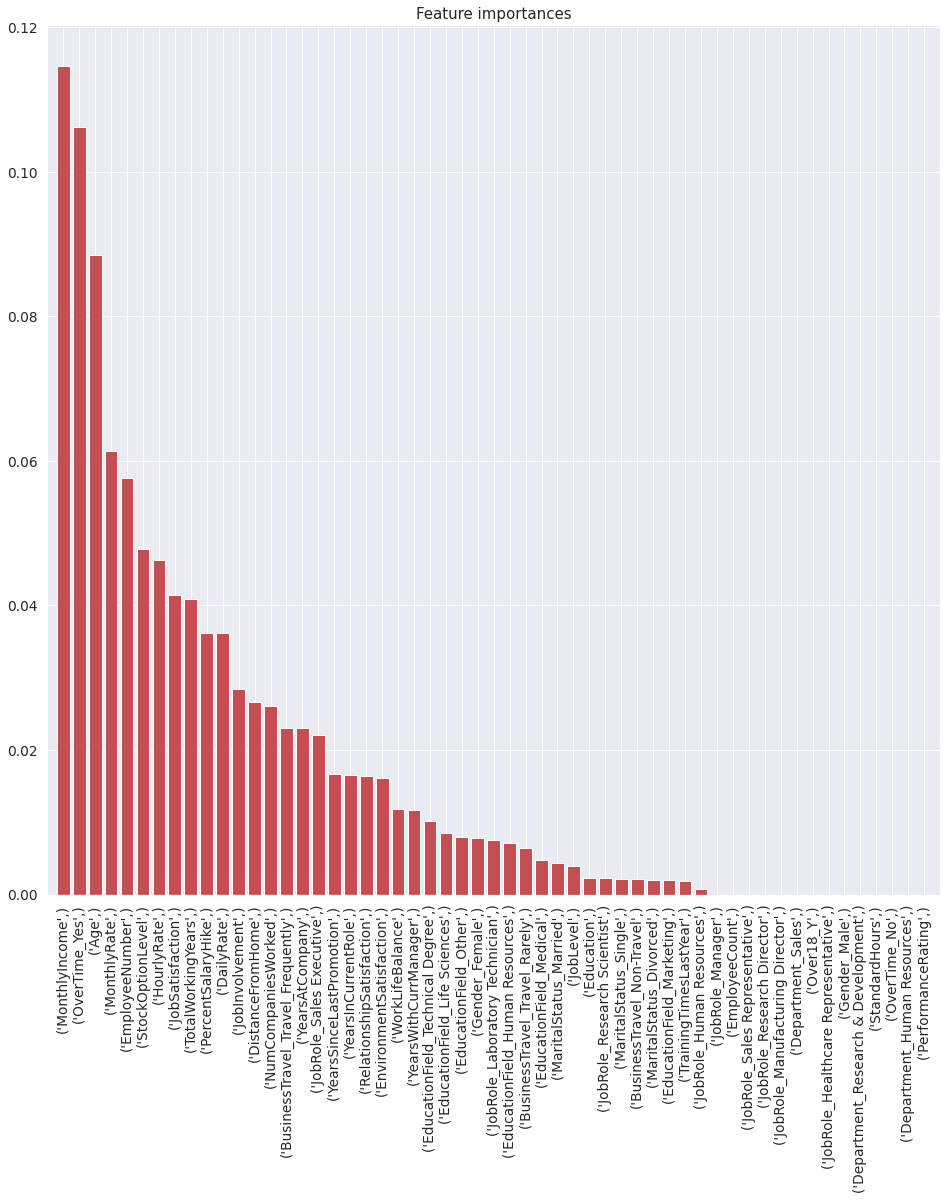

In [85]:
importances = classifier.feature_importances_
#std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
   #          axis=0)
indices = np.argsort(importances)[::-1]

columns = x_train.columns.tolist()
impfeatures = []
for i in list(indices):
  impfeatures.append(columns[i])

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%s. : scores(%f)" % (impfeatures[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), impfeatures)
plt.xticks(rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [51]:
# predict test set and train set as well.
y_pred = classifier.predict(x_test)  # predict test data
y_pred_train = classifier.predict(x_train) # predict train data

In [52]:
## model evaluations

print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))  

Accuracy score:  0.8891891891891892
Training-set accuracy score: 1.0000


[[315  67]
 [ 15 343]]


              precision    recall  f1-score   support

           0       0.95      0.82      0.88       382
           1       0.84      0.96      0.89       358

    accuracy                           0.89       740
   macro avg       0.90      0.89      0.89       740
weighted avg       0.90      0.89      0.89       740



Accuracies are good. Model seems a little overfit but alternative evaluation metrics are giving comparable scores for both class label values o and 1. 

#### 3. RandomForestClassifier 

In [87]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [88]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [89]:
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [90]:
rf_random.fit(x_train,y_train)  # training model

y_pred = rf_random.predict(x_test)   # predicting test data
y_pred_train = rf_random.predict(x_train)   # predicting train data


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


In [91]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [94]:
# Lets evaluate our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

print("Accuracy score: ", accuracy_score(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))  
print('Training complete.')

Training-set accuracy score: 1.0000
Accuracy score:  0.9621621621621622


[[356  26]
 [  2 356]]


              precision    recall  f1-score   support

           0       0.99      0.93      0.96       382
           1       0.93      0.99      0.96       358

    accuracy                           0.96       740
   macro avg       0.96      0.96      0.96       740
weighted avg       0.96      0.96      0.96       740

Training complete.
